# Cluster Analysis

## Agenda

* Problem Statement
* Understanding Data
* Data Preparation
    * Choose relevant features
    * Missing value analysis
    * Data standardization
* Hierarchical(Agglomerative) Clustering
* K-Means Clustering
* Clustering in practice
    * Silhouette value of clusters
    * Stability check of the clusters
    * Categorize new samples into predefined clusters

### Problem Statement

The data set (Cereals.csv) given to you has nutritional information of various cereals available in the market. Based on the information, the elementary public schools would like to choose a set of cereals to include in their daily cafeterias. Every day a different cereal is offered, but all cereals should support a healthy diet.

##### Attributes Description
* name: Name of cereal
* calories: calories per serving
* protein: grams of protein
* fat: grams of fat
* sodium: milligrams of sodium
* fiber: grams of dietary fiber
* carbo: grams of complex carbohydrates
* sugars: grams of sugars
* potass: milligrams of potassium
* vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
* shelf: display shelf (1, 2, or 3, counting from the floor)
* weight: weight in ounces of one serving
* cups: number of cups in one serving
* rating: rating of the cereals (Possibly from Consumer Reports)

In [1]:
#Import required packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

### Understanding Data

In [3]:
cereals = pd.read_csv("Cereals.csv")
cereals.head()

name  calories  protein  fat  sodium  fiber  carbo  \
0                  100%_Bran        70        4    1     130   10.0    5.0   
1          100%_Natural_Bran       120        3    5      15    2.0    8.0   
2                   All-Bran        70        4    1     260    9.0    7.0   
3  All-Bran_with_Extra_Fiber        50        4    0     140   14.0    8.0   
4             Almond_Delight       110        2    2     200    1.0   14.0   

   sugars  potass  vitamins  shelf  weight  cups     rating  
0     6.0   280.0        25      3     1.0  0.33  68.402973  
1     8.0   135.0         0      3     1.0  1.00  33.983679  
2     5.0   320.0        25      3     1.0  0.33  59.425505  
3     0.0   330.0        25      3     1.0  0.50  93.704912  
4     8.0     NaN        25      3     1.0  0.75  34.384843

In [6]:
@interact
def First_Rows(rows=5):
    return cereals.head(rows)

interactive(children=(IntSlider(value=5, description='rows', max=15, min=-5), Output()), _dom_classes=('widget…

In [7]:
# Data type of each attribute
@interact
def describe(column=cereals.columns):
    return cereals[[column]].describe()

interactive(children=(Dropdown(description='column', options=('name', 'calories', 'protein', 'fat', 'sodium', …

In [5]:
cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   calories  77 non-null     int64  
 2   protein   77 non-null     int64  
 3   fat       77 non-null     int64  
 4   sodium    77 non-null     int64  
 5   fiber     77 non-null     float64
 6   carbo     76 non-null     float64
 7   sugars    76 non-null     float64
 8   potass    75 non-null     float64
 9   vitamins  77 non-null     int64  
 10  shelf     77 non-null     int64  
 11  weight    77 non-null     float64
 12  cups      77 non-null     float64
 13  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(1)
memory usage: 8.6+ KB


In [4]:
#Summary statistics
cereals.describe()

calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  76.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.802632   
std     19.484119   1.094790   1.006473   83.832295   2.383364   3.907326   
min     50.000000   1.000000   0.000000    0.000000   0.000000   5.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.500000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  76.000000   75.000000   77.000000  77.000000  77.000000  77.000000   
mean    7.026316   98.666667   28.246753   2.207792   1.029610   0.821039   
std     4.378656   70.410636   22.342523   0.832524   0.150477   0.232716   
min     0.000000   15.000000    0.000000   1.000000   0.500000   0.250000   
25%     3.000000   42.500000   25.000000   1.000000   1.000000   0.670000   
50%     7.000000   90.000000   25.000000   2.000000   1.000000   0.750000   
75%    11.000000  120.000000   25.000000   3.000000   1.000000   1.000000   
max    15.000000  330.000000  100.000000   3.000000   1.500000   1.500000   

          rating  
count  77.000000  
mean   42.665705  
std    14.047289  
min    18.042851  
25%    33.174094  
50%    40.400208  
75%    50.828392  
max    93.704912

### Data Preparation

#### Choose required features

In [8]:
cereals['label'] = cereals['name']+ ' (' + cereals['shelf'].astype(str) + " - " + \
                    round(cereals['rating'],2).astype(str) + ')'
cereals.head(3)

name  calories  protein  fat  sodium  fiber  carbo  sugars  \
0          100%_Bran        70        4    1     130   10.0    5.0     6.0   
1  100%_Natural_Bran       120        3    5      15    2.0    8.0     8.0   
2           All-Bran        70        4    1     260    9.0    7.0     5.0   

   potass  vitamins  shelf  weight  cups     rating  \
0   280.0        25      3     1.0  0.33  68.402973   
1   135.0         0      3     1.0  1.00  33.983679   
2   320.0        25      3     1.0  0.33  59.425505   

                           label  
0           100%_Bran (3 - 68.4)  
1  100%_Natural_Bran (3 - 33.98)  
2           All-Bran (3 - 59.43)

In [9]:
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)
cereals.head(3)

calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0     6.0   280.0        25   
1       120        3    5      15    2.0    8.0     8.0   135.0         0   
2        70        4    1     260    9.0    7.0     5.0   320.0        25   

   weight  cups                          label  
0     1.0  0.33           100%_Bran (3 - 68.4)  
1     1.0  1.00  100%_Natural_Bran (3 - 33.98)  
2     1.0  0.33           All-Bran (3 - 59.43)

In [10]:
cereal_label = cereals['label']
## Select all columns except "label"
cereals.drop('label', axis=1, inplace=True)
cereals.head(3)

calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0     6.0   280.0        25   
1       120        3    5      15    2.0    8.0     8.0   135.0         0   
2        70        4    1     260    9.0    7.0     5.0   320.0        25   

   weight  cups  
0     1.0  0.33  
1     1.0  1.00  
2     1.0  0.33

In [11]:
cereal_label

0                     100%_Bran (3 - 68.4)
1            100%_Natural_Bran (3 - 33.98)
2                     All-Bran (3 - 59.43)
3     All-Bran_with_Extra_Fiber (3 - 93.7)
4               Almond_Delight (3 - 34.38)
                      ...                 
72                     Triples (3 - 39.11)
73                        Trix (2 - 27.75)
74                  Wheat_Chex (1 - 49.79)
75                    Wheaties (1 - 51.59)
76         Wheaties_Honey_Gold (1 - 36.19)
Name: label, Length: 77, dtype: object

#### Missing value analysis

In [12]:
cereals.isnull().sum(axis=0)

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
weight      0
cups        0
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
mean_imputer.fit(cereals)
mean_imputer

SimpleImputer()

In [14]:
cereals = pd.DataFrame(mean_imputer.transform(cereals),columns=cereals.columns)

In [15]:
cereals.isnull().sum(axis=0)

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
weight      0
cups        0
dtype: int64

#### Data Standardization

In [16]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(cereals)
cereals_std = pd.DataFrame(standardizer.transform(cereals), columns = cereals.columns)
cereals_std.head()

calories   protein       fat    sodium     fiber     carbo    sugars  \
0 -1.905397  1.337319 -0.012988 -0.356306  3.314439 -2.542013 -0.237495   
1  0.677623  0.417912  3.987349 -1.737087 -0.064172 -1.764055  0.225316   
2 -1.905397  1.337319 -0.012988  1.204578  2.892113 -2.023374 -0.468901   
3 -2.938605  1.337319 -1.013072 -0.236238  5.003745 -1.764055 -1.625929   
4  0.161019 -0.501495  0.987096  0.484170 -0.486498 -0.208138  0.225316   

     potass  vitamins    weight      cups  
0  2.627053  -0.14627 -0.198067 -2.123870  
1  0.526376  -1.27255 -0.198067  0.774053  
2  3.206550  -0.14627 -0.198067 -2.123870  
3  3.351425  -0.14627 -0.198067 -1.388576  
4  0.000000  -0.14627 -0.198067 -0.307262

In [17]:
cereals_std.describe()

calories       protein           fat        sodium         fiber  \
count  7.700000e+01  7.700000e+01  7.700000e+01  7.700000e+01  7.700000e+01   
mean  -8.398765e-17  2.018587e-17  8.583502e-17  5.767392e-18  9.155735e-17   
std    1.006557e+00  1.006557e+00  1.006557e+00  1.006557e+00  1.006557e+00   
min   -2.938605e+00 -1.420902e+00 -1.013072e+00 -1.917189e+00 -9.088244e-01   
25%   -3.555846e-01 -5.014948e-01 -1.013072e+00 -3.563056e-01 -4.864980e-01   
50%    1.610194e-01  4.179123e-01 -1.298811e-02  2.440343e-01 -6.417167e-02   
75%    1.610194e-01  4.179123e-01  9.870962e-01  6.042382e-01  3.581547e-01   
max    2.744040e+00  3.176134e+00  3.987349e+00  1.924986e+00  5.003745e+00   

              carbo        sugars        potass      vitamins        weight  \
count  7.700000e+01  7.700000e+01  7.700000e+01  7.700000e+01  7.700000e+01   
mean  -4.066012e-16 -2.000564e-16 -8.506904e-17  2.883696e-17 -1.881612e-16   
std    1.006557e+00  1.006557e+00  1.006557e+00  1.006557e+00  1.006557e+00   
min   -2.542013e+00 -1.625929e+00 -1.212115e+00 -1.272550e+00 -3.542628e+00   
25%   -7.267769e-01 -9.317120e-01 -7.774919e-01 -1.462701e-01 -1.980675e-01   
50%   -4.606439e-16 -6.089621e-03 -1.255577e-01 -1.462701e-01 -1.980675e-01   
75%    5.698204e-01  9.195328e-01  3.090651e-01 -1.462701e-01 -1.980675e-01   
max    2.125737e+00  1.845155e+00  3.351425e+00  3.232570e+00  3.146493e+00   

               cups  
count  7.700000e+01  
mean   1.492313e-16  
std    1.006557e+00  
min   -2.469891e+00  
25%   -6.532825e-01  
50%   -3.072619e-01  
75%    7.740527e-01  
max    2.936682e+00

### Agglomerative Clustering

**Parameter description**

n_clusters : The number of clusters to find.

linkage : {“ward”, “complete”, “average”}
- ward minimizes the variance of the clusters being merged.
- complete uses the maximum distances between all observations of the two sets.
- average uses the average of the distances of each observation of the two sets.

affinity : {“euclidean”, “l1”, “l2”, “manhattan”, “cosine”}

In [18]:
cereals.head(3)

calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0      70.0      4.0  1.0   130.0   10.0    5.0     6.0   280.0      25.0   
1     120.0      3.0  5.0    15.0    2.0    8.0     8.0   135.0       0.0   
2      70.0      4.0  1.0   260.0    9.0    7.0     5.0   320.0      25.0   

   weight  cups  
0     1.0  0.33  
1     1.0  1.00  
2     1.0  0.33

In [19]:
cereals_std.head(3)

calories   protein       fat    sodium     fiber     carbo    sugars  \
0 -1.905397  1.337319 -0.012988 -0.356306  3.314439 -2.542013 -0.237495   
1  0.677623  0.417912  3.987349 -1.737087 -0.064172 -1.764055  0.225316   
2 -1.905397  1.337319 -0.012988  1.204578  2.892113 -2.023374 -0.468901   

     potass  vitamins    weight      cups  
0  2.627053  -0.14627 -0.198067 -2.123870  
1  0.526376  -1.27255 -0.198067  0.774053  
2  3.206550  -0.14627 -0.198067 -2.123870

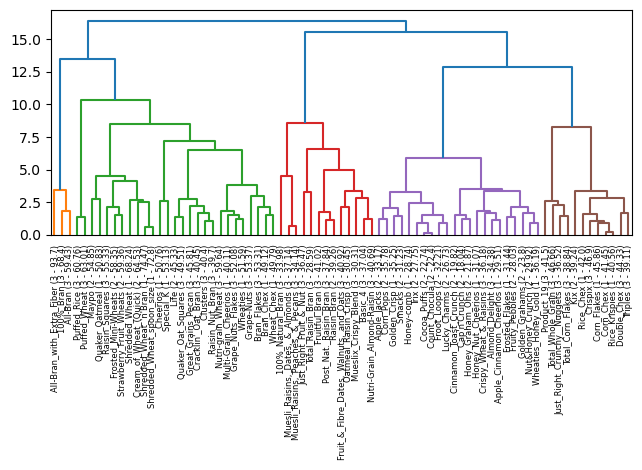

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

from scipy.cluster.hierarchy import linkage, dendrogram

# Preparing linkage matrix
linkage_matrix = linkage(cereals_std, method='ward',metric='euclidean')

dendrogram(linkage_matrix,labels=cereal_label.values)
plt.tight_layout()
plt.show()

In [21]:
linkage_matrix

array([[1.40000000e+01, 1.80000000e+01, 1.44874262e-01, 2.00000000e+00],
       [1.50000000e+01, 6.20000000e+01, 1.88161824e-01, 2.00000000e+00],
       [6.40000000e+01, 6.50000000e+01, 5.74073478e-01, 2.00000000e+00],
       [4.40000000e+01, 4.50000000e+01, 6.60373898e-01, 2.00000000e+00],
       [1.60000000e+01, 7.80000000e+01, 8.75507965e-01, 3.00000000e+00],
       [4.80000000e+01, 7.60000000e+01, 8.85514125e-01, 2.00000000e+00],
       [7.30000000e+01, 7.70000000e+01, 9.00789301e-01, 3.00000000e+00],
       [2.40000000e+01, 4.20000000e+01, 9.30820518e-01, 2.00000000e+00],
       [1.30000000e+01, 5.90000000e+01, 1.02098928e+00, 2.00000000e+00],
       [2.10000000e+01, 8.10000000e+01, 1.08586587e+00, 4.00000000e+00],
       [5.20000000e+01, 5.80000000e+01, 1.10266673e+00, 2.00000000e+00],
       [4.00000000e+00, 5.00000000e+00, 1.14573093e+00, 2.00000000e+00],
       [3.20000000e+01, 7.50000000e+01, 1.18437314e+00, 2.00000000e+00],
       [1.00000000e+01, 3.50000000e+01, 1.19253426e

In [22]:
from sklearn.cluster import AgglomerativeClustering

## Instantiating object
agg_clust = AgglomerativeClustering(n_clusters=6, metric = 'euclidean', linkage='ward')

## Training model and return class labels
agg_clusters = agg_clust.fit_predict(cereals_std)

In [23]:
agg_clusters

array([3, 0, 3, 3, 4, 4, 4, 0, 2, 2, 4, 2, 4, 2, 4, 1, 1, 4, 4, 2, 2, 1,
       4, 1, 4, 4, 2, 0, 0, 4, 4, 4, 2, 2, 2, 4, 4, 4, 1, 0, 1, 2, 4, 2,
       0, 0, 0, 2, 4, 0, 2, 0, 0, 1, 5, 5, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2,
       4, 2, 2, 1, 0, 1, 1, 4, 2, 2, 4])

In [24]:
np.unique(agg_clusters, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([13, 12, 25,  3, 22,  2]))

In [25]:
## Label - Cluster
agg_result = pd.DataFrame({"label":cereal_label,"agg_cluster":agg_clusters})
agg_result.head()

label  agg_cluster
0                  100%_Bran (3 - 68.4)            3
1         100%_Natural_Bran (3 - 33.98)            0
2                  All-Bran (3 - 59.43)            3
3  All-Bran_with_Extra_Fiber (3 - 93.7)            3
4            Almond_Delight (3 - 34.38)            4

In [26]:
agg_result

label  agg_cluster
0                   100%_Bran (3 - 68.4)            3
1          100%_Natural_Bran (3 - 33.98)            0
2                   All-Bran (3 - 59.43)            3
3   All-Bran_with_Extra_Fiber (3 - 93.7)            3
4             Almond_Delight (3 - 34.38)            4
..                                   ...          ...
72                   Triples (3 - 39.11)            1
73                      Trix (2 - 27.75)            4
74                Wheat_Chex (1 - 49.79)            2
75                  Wheaties (1 - 51.59)            2
76       Wheaties_Honey_Gold (1 - 36.19)            4

[77 rows x 2 columns]

### K-Means Clustering

- Kmeans is a distance based iterative technique, where the instances that are "closer" are "grouped" together forming a "cluster".
- This "closeness" is computed by distances,by default, Euclidean distances
- We need to specify prior, how many clusters we want to get.
- What is iterative in this case?
    - We specify a number of clusters we need, so in the first iteration, centroids(centre) of the cluster are randomly picked in the data (this centroid need not be a data point but could be any other point as well). For eg: if we need 3 clusters, 3 centroids are randomly picked.
    - Now with respect to each of these centroids, distance is computed for each of the points in the data and the data point is assigned to that cluster for which the point's distance is closest to its centroid. This is "Assignment phase".
    - Once all points are assigned to the clusters, new centroids are computed from the points of each cluster (in 2d it is (x1+x2)/2, (y1+y2)/2)..remember this formula :)
    - Once, this new centroids are computed, the assignment phase starts-- compute the distance between each of the data points with each of the new centroids and assign the point to the closest cluster. After assignment, the new cluster centroids are computed. This process continues until there is no change in cluster centroids from previous iteration

In [27]:
from sklearn.cluster import KMeans
kmeans_object = KMeans(n_clusters=5, random_state=1240)
kmeans_object.fit(cereals_std)
kmeans_clusters = kmeans_object.predict(cereals_std)

In [28]:
kmeans_clusters

array([0, 0, 0, 0, 2, 2, 2, 4, 0, 0, 2, 1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1,
       2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 4, 4, 1, 0, 2, 0,
       0, 0, 4, 1, 2, 4, 1, 0, 0, 1, 3, 3, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0,
       2, 1, 2, 4, 4, 4, 1, 2, 0, 1, 2], dtype=int32)

In [29]:
np.unique(kmeans_clusters, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([28, 15, 23,  3,  8]))

In [30]:
kmeans_results = pd.DataFrame({"label":cereal_label,"kmeans_cluster":kmeans_clusters})
kmeans_results.head()

label  kmeans_cluster
0                  100%_Bran (3 - 68.4)               0
1         100%_Natural_Bran (3 - 33.98)               0
2                  All-Bran (3 - 59.43)               0
3  All-Bran_with_Extra_Fiber (3 - 93.7)               0
4            Almond_Delight (3 - 34.38)               2

#### Inspecting cluster centroids to understand average statistics of each cluster

In [31]:
## Using inverse_transform to retrive actual values from standardized data
cluster_centroids = pd.DataFrame(standardizer.inverse_transform(kmeans_object.cluster_centers_),
                                 columns=cereals.columns)
cluster_centroids

calories   protein       fat      sodium     fiber      carbo     sugars  \
0  104.285714  3.285714  1.357143  125.000000  3.989286  13.314380   6.500940   
1  104.666667  2.733333  0.400000  235.333333  1.066667  19.533333   2.800000   
2  110.000000  1.565217  1.000000  163.260870  0.695652  12.608696  11.043478   
3   60.000000  1.666667  0.000000    0.000000  1.333333  13.000000   0.000000   
4  128.750000  2.750000  1.375000  188.750000  2.250000  18.125000   7.875000   

       potass   vitamins    weight      cups  
0  157.321429  21.428571  1.053214  0.638214  
1   61.911111  28.333333  1.000000  1.025333  
2   51.463768  25.000000  1.000000  0.875217  
3   53.333333   0.000000  0.610000  1.000000  
4  115.000000  71.875000  1.245000  0.855000

In [32]:
cluster_centroids.to_csv("cereals_best_kmeans_cluster_centroids.csv")

#### In the above case, we have randomly given clusters number. But how would we know the optimal clusters
- The clustering is said to be good, if the points in the cluster are closer to each other and the clusters themselves are far apart. The two quantities which describe the above said factors are "Within Sum of Squares (wss)" and "Between Sum of Squares(bss)" respectively. In kmeans function in python, wss is defined as inertia.
- Ideally, if wss is minimum, we have a better clustering.
- Now the question is.. how do we choose k

**Parameter description**

n_clusters : The number of clusters to find.

n_init : Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

max_iter : max iterations of recomputing new cluster centroids

In [33]:
wss= {}
for k in range(1, 21):
    kmeans_loop = KMeans(n_clusters=k,n_init=30,max_iter=300,random_state=1000).fit(cereals_std)
    clusters = kmeans_loop.labels_
    wss[k] = kmeans_loop.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center


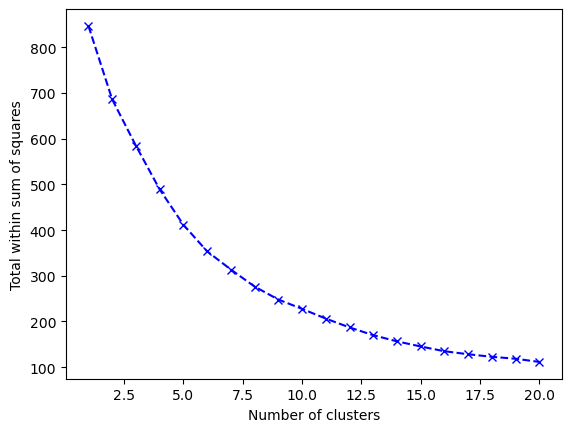

In [34]:
import matplotlib.pyplot as plt
plt.figure()

plt.plot(list(wss.keys()),list(wss.values()), 'bx--')
plt.xlabel('Number of clusters')
plt.ylabel('Total within sum of squares')
plt.show()

### Silhouette Analysis
**Higher the silhouette score better the clustering**

*The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.*

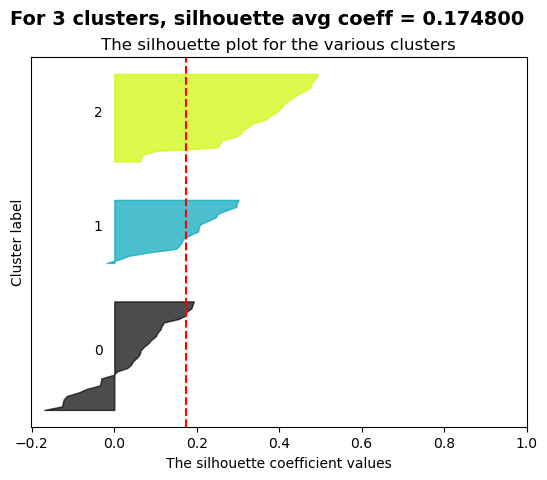

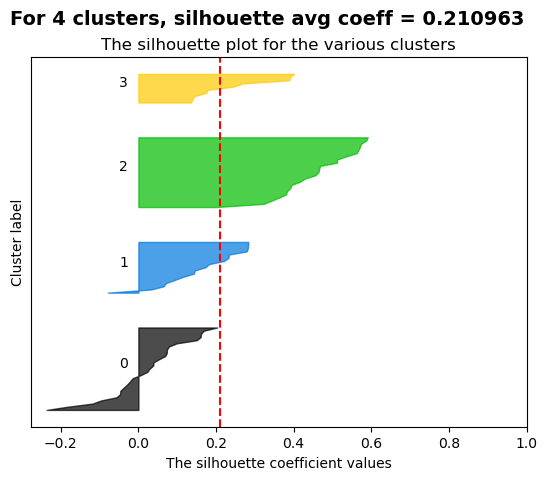

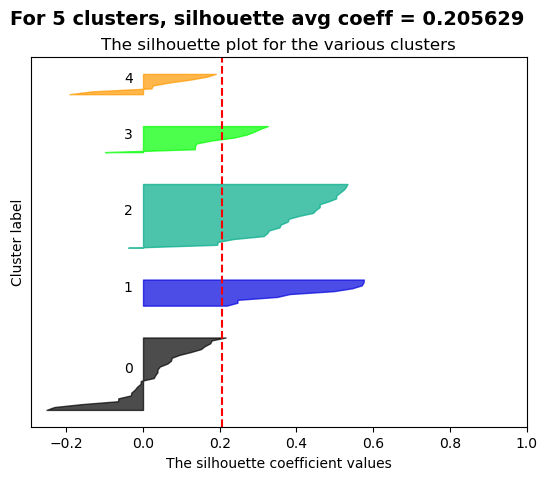

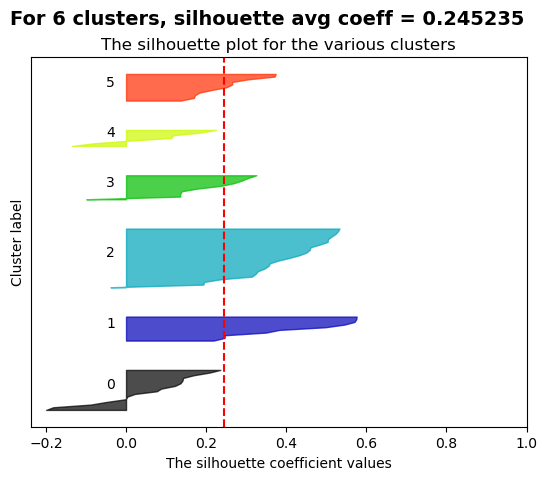

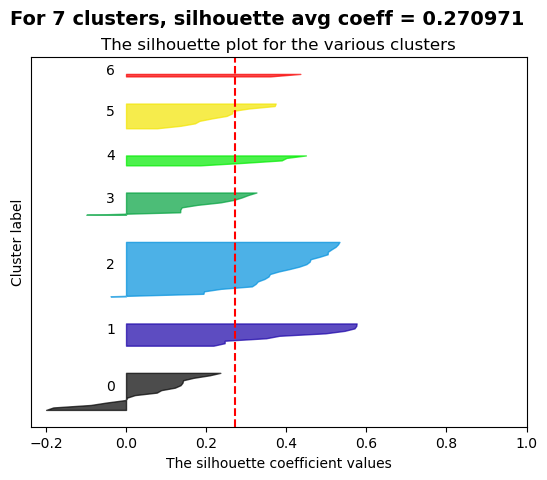

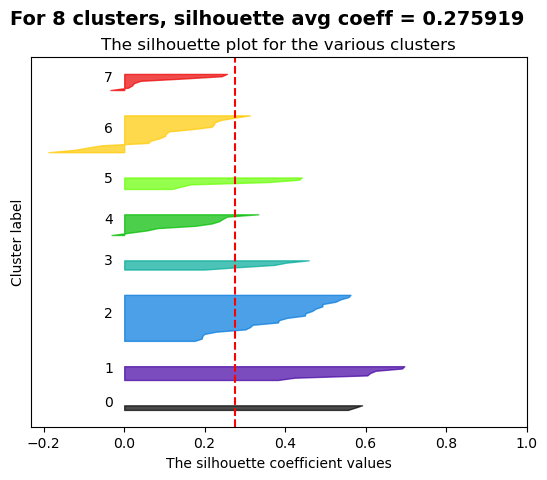

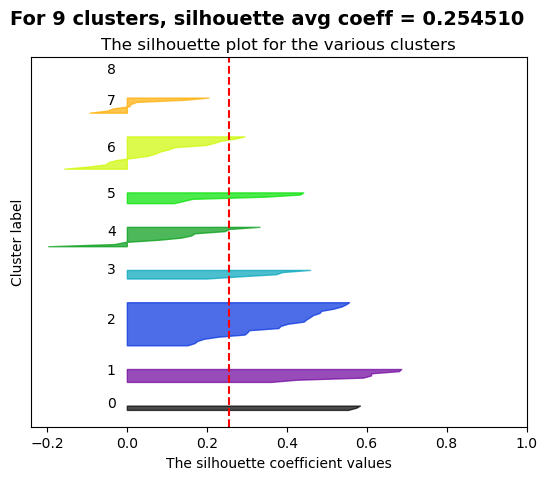

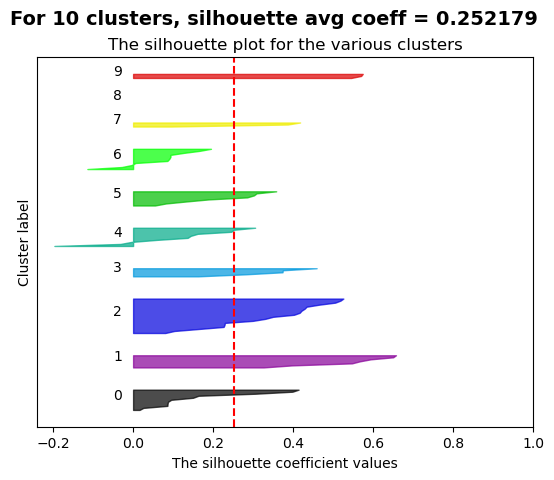

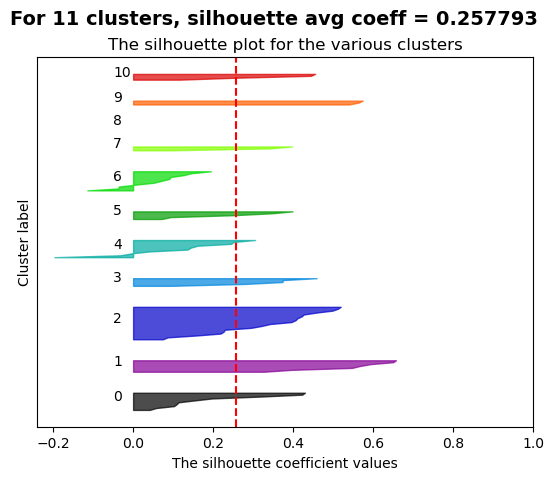

In [35]:
## Standard plotting code copied from sklearn documentation.
## Just change "X_matrix" to the data of your choice

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

### Just change this to your dataframe
X_matrix = cereals_std.values

range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots()


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_matrix, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_matrix, cluster_labels)

    y_lower = 0
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("For %d clusters, silhouette avg coeff = %f " % (n_clusters,silhouette_avg)),
                 fontsize=14, fontweight='bold')
    plt.show()

#### Note: Higher the silhouette score better the clustering.
Hence best K value for this dataset is 8

In [36]:
best_kmeans = KMeans(n_clusters=8, random_state=1240)
best_kmeans.fit(cereals_std)
best_kmeans_labels = best_kmeans.predict(cereals_std)

In [37]:
kmeans_results = pd.DataFrame({"label":cereal_label,"kmeans_cluster":best_kmeans_labels})
kmeans_results.head()

label  kmeans_cluster
0                  100%_Bran (3 - 68.4)               6
1         100%_Natural_Bran (3 - 33.98)               0
2                  All-Bran (3 - 59.43)               6
3  All-Bran_with_Extra_Fiber (3 - 93.7)               6
4            Almond_Delight (3 - 34.38)               2

### Add Cluster Labels to Original Data

In [39]:
cereals = pd.read_csv("Cereals.csv")
cereals['label'] = cereals['name']+ ' (' + cereals['shelf'].astype(str) + " - " + round(cereals['rating'],2).astype(str) + ')'
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)

final_cluster_data = pd.merge(cereals, kmeans_results, on='label')
final_cluster_data.head(10)


calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0     6.0   280.0        25   
1       120        3    5      15    2.0    8.0     8.0   135.0         0   
2        70        4    1     260    9.0    7.0     5.0   320.0        25   
3        50        4    0     140   14.0    8.0     0.0   330.0        25   
4       110        2    2     200    1.0   14.0     8.0     NaN        25   
5       110        2    2     180    1.5   10.5    10.0    70.0        25   
6       110        2    0     125    1.0   11.0    14.0    30.0        25   
7       130        3    2     210    2.0   18.0     8.0   100.0        25   
8        90        2    1     200    4.0   15.0     6.0   125.0        25   
9        90        3    0     210    5.0   13.0     5.0   190.0        25   

   weight  cups                                 label  kmeans_cluster  
0    1.00  0.33                  100%_Bran (3 - 68.4)               6  
1    1.00  1.00         100%_Natural_Bran (3 - 33.98)               0  
2    1.00  0.33                  All-Bran (3 - 59.43)               6  
3    1.00  0.50  All-Bran_with_Extra_Fiber (3 - 93.7)               6  
4    1.00  0.75            Almond_Delight (3 - 34.38)               2  
5    1.00  0.75   Apple_Cinnamon_Cheerios (1 - 29.51)               2  
6    1.00  1.00               Apple_Jacks (2 - 33.17)               2  
7    1.33  0.75                   Basic_4 (3 - 37.04)               4  
8    1.00  0.67                 Bran_Chex (1 - 49.12)               5  
9    1.00  0.67               Bran_Flakes (3 - 53.31)               5

In [40]:
final_cluster_data.shape

(77, 13)

In [41]:
final_cluster_data.kmeans_cluster.value_counts()

kmeans_cluster
2    23
5    18
4    11
0     8
1     7
7     5
6     3
3     2
Name: count, dtype: int64

In [42]:
final_cluster_data

calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0         70        4    1     130   10.0    5.0     6.0   280.0        25   
1        120        3    5      15    2.0    8.0     8.0   135.0         0   
2         70        4    1     260    9.0    7.0     5.0   320.0        25   
3         50        4    0     140   14.0    8.0     0.0   330.0        25   
4        110        2    2     200    1.0   14.0     8.0     NaN        25   
..       ...      ...  ...     ...    ...    ...     ...     ...       ...   
72       110        2    1     250    0.0   21.0     3.0    60.0        25   
73       110        1    1     140    0.0   13.0    12.0    25.0        25   
74       100        3    1     230    3.0   17.0     3.0   115.0        25   
75       100        3    1     200    3.0   17.0     3.0   110.0        25   
76       110        2    1     200    1.0   16.0     8.0    60.0        25   

    weight  cups                                 label  kmeans_cluster  
0      1.0  0.33                  100%_Bran (3 - 68.4)               6  
1      1.0  1.00         100%_Natural_Bran (3 - 33.98)               0  
2      1.0  0.33                  All-Bran (3 - 59.43)               6  
3      1.0  0.50  All-Bran_with_Extra_Fiber (3 - 93.7)               6  
4      1.0  0.75            Almond_Delight (3 - 34.38)               2  
..     ...   ...                                   ...             ...  
72     1.0  0.75                   Triples (3 - 39.11)               1  
73     1.0  1.00                      Trix (2 - 27.75)               2  
74     1.0  0.67                Wheat_Chex (1 - 49.79)               5  
75     1.0  1.00                  Wheaties (1 - 51.59)               5  
76     1.0  0.75       Wheaties_Honey_Gold (1 - 36.19)               2  

[77 rows x 13 columns]

### Analyzing clusters

In [43]:
ClusterLevelMean = final_cluster_data.groupby(['kmeans_cluster']).mean(numeric_only=True).reset_index()
ClusterLevelMean

kmeans_cluster    calories   protein       fat      sodium      fiber  \
0               0  107.500000  3.500000  2.500000   99.375000   2.525000   
1               1  108.571429  1.857143  0.285714  261.428571   0.285714   
2               2  110.434783  1.565217  1.043478  172.173913   0.652174   
3               3   50.000000  1.500000  0.000000    0.000000   0.500000   
4               4  134.545455  3.181818  1.727273  181.363636   3.681818   
5               5   96.666667  3.111111  0.388889  118.055556   2.611111   
6               6   63.333333  4.000000  0.666667  176.666667  11.000000   
7               7  112.000000  2.600000  0.800000  212.000000   1.400000   

       carbo     sugars      potass    vitamins    weight      cups  
0  11.500000   6.571429  119.375000   18.750000  1.000000  0.583750  
1  21.571429   2.714286   36.428571   25.000000  1.000000  1.054286  
2  12.608696  11.086957   49.318182   25.000000  1.000000  0.875217  
3  11.500000   0.000000   32.500000    0.000000  0.500000  1.000000  
4  15.227273  11.090909  179.090909   31.818182  1.286364  0.759091  
5  16.611111   3.166667  105.588235   19.444444  0.990556  0.821111  
6   6.666667   3.666667  310.000000   25.000000  1.000000  0.386667  
7  18.800000   4.800000   69.000000  100.000000  1.060000  0.950000

#### Checking cluster stability

In [44]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

In [47]:
indices=cereals_std.sample(frac=0.9,random_state=123).index
indices

Index([53, 64, 70,  4, 60, 23, 29, 61,  8, 74,  9, 75, 44, 24, 76, 63, 71, 43,
       51,  1, 37, 45, 58, 31, 14, 72, 16, 26, 19, 69,  6, 62, 50, 67, 15, 18,
       13, 22, 10, 59, 11,  0,  5, 42,  3, 40, 12, 54, 34, 27, 30, 21, 33, 38,
       52, 28, 35, 41,  7, 48, 56, 73, 20, 65, 39,  2, 55, 49, 68],
      dtype='int64')

In [51]:
cereals_std_subset=cereals_std.iloc[indices,:]

In [52]:
cereals_std_subset.shape

(69, 11)

In [61]:
kmeans_object = KMeans(n_clusters=5,n_init=30,max_iter=300,random_state=1000)
kmeans_object.fit(cereals_std)
clus1= kmeans_object.predict(cereals_std)

In [62]:
kmeans_object = KMeans(n_clusters=5,n_init=30,max_iter=300,random_state=1000)
kmeans_object.fit(cereals_std_subset)
clus2= kmeans_object.predict(cereals_std_subset)

In [63]:
print(len(clus1))
print(len(clus2))

77
69


In [64]:
clus1=clus1[indices]
print(len(clus1))
print(len(clus2))

69
69


In [65]:
adjusted_rand_score(clus1,clus2)

0.6530732963343134

### Categorize new samples into predefined clusters

In [66]:
newdata=pd.read_csv("Cereals.csv",nrows=5) ## Assume this part is a newly added samples for demonstration

In [67]:
newdata

name  calories  protein  fat  sodium  fiber  carbo  \
0                  100%_Bran        70        4    1     130     10      5   
1          100%_Natural_Bran       120        3    5      15      2      8   
2                   All-Bran        70        4    1     260      9      7   
3  All-Bran_with_Extra_Fiber        50        4    0     140     14      8   
4             Almond_Delight       110        2    2     200      1     14   

   sugars  potass  vitamins  shelf  weight  cups     rating  
0       6   280.0        25      3       1  0.33  68.402973  
1       8   135.0         0      3       1  1.00  33.983679  
2       5   320.0        25      3       1  0.33  59.425505  
3       0   330.0        25      3       1  0.50  93.704912  
4       8     NaN        25      3       1  0.75  34.384843

In [68]:
newdata['label'] = newdata['name']+ ' (' + newdata['shelf'].astype(str) + " - " + \
                    round(newdata['rating'],2).astype(str) + ')'

newdata.drop(['name','shelf','rating'], axis=1, inplace=True)


newdata_label = newdata['label']
## Select all columns except "label"
newdata.drop('label', axis=1, inplace=True)
newdata

calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130     10      5       6   280.0        25   
1       120        3    5      15      2      8       8   135.0         0   
2        70        4    1     260      9      7       5   320.0        25   
3        50        4    0     140     14      8       0   330.0        25   
4       110        2    2     200      1     14       8     NaN        25   

   weight  cups  
0       1  0.33  
1       1  1.00  
2       1  0.33  
3       1  0.50  
4       1  0.75

In [69]:
newdata = pd.DataFrame(mean_imputer.transform(newdata),columns=newdata.columns)
newdata


calories  protein  fat  sodium  fiber  carbo  sugars      potass  vitamins  \
0      70.0      4.0  1.0   130.0   10.0    5.0     6.0  280.000000      25.0   
1     120.0      3.0  5.0    15.0    2.0    8.0     8.0  135.000000       0.0   
2      70.0      4.0  1.0   260.0    9.0    7.0     5.0  320.000000      25.0   
3      50.0      4.0  0.0   140.0   14.0    8.0     0.0  330.000000      25.0   
4     110.0      2.0  2.0   200.0    1.0   14.0     8.0   98.666667      25.0   

   weight  cups  
0     1.0  0.33  
1     1.0  1.00  
2     1.0  0.33  
3     1.0  0.50  
4     1.0  0.75

In [72]:
newdata_std = pd.DataFrame(standardizer.transform(newdata))
newdata_std

0         1         2         3         4         5         6   \
0 -1.905397  1.337319 -0.012988 -0.356306  3.314439 -2.542013 -0.237495   
1  0.677623  0.417912  3.987349 -1.737087 -0.064172 -1.764055  0.225316   
2 -1.905397  1.337319 -0.012988  1.204578  2.892113 -2.023374 -0.468901   
3 -2.938605  1.337319 -1.013072 -0.236238  5.003745 -1.764055 -1.625929   
4  0.161019 -0.501495  0.987096  0.484170 -0.486498 -0.208138  0.225316   

         7        8         9         10  
0  2.627053 -0.14627 -0.198067 -2.123870  
1  0.526376 -1.27255 -0.198067  0.774053  
2  3.206550 -0.14627 -0.198067 -2.123870  
3  3.351425 -0.14627 -0.198067 -1.388576  
4  0.000000 -0.14627 -0.198067 -0.307262

In [73]:
best_kmeans_labels = best_kmeans.predict(newdata_std)
best_kmeans_labels

/opt/homebrew/Caskroom/miniconda/base/envs/accelai/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([6, 0, 6, 6, 2], dtype=int32)

In [76]:
kmeans_results = pd.DataFrame({"label":newdata_label,"kmeans_cluster":best_kmeans_labels})
kmeans_results

label  kmeans_cluster
0                  100%_Bran (3 - 68.4)               6
1         100%_Natural_Bran (3 - 33.98)               0
2                  All-Bran (3 - 59.43)               6
3  All-Bran_with_Extra_Fiber (3 - 93.7)               6
4            Almond_Delight (3 - 34.38)               2

In [77]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.25, min_samples=3)
clusters = dbscan.fit_predict(cereals_std)

# Add the cluster labels to the original dataframe
cereals_std['Cluster'] = clusters



In [79]:
# Check the cluster labels
print(np.unique(clusters))

[-1]


In [80]:
cereals_std

calories   protein       fat    sodium     fiber     carbo    sugars  \
0  -1.905397  1.337319 -0.012988 -0.356306  3.314439 -2.542013 -0.237495   
1   0.677623  0.417912  3.987349 -1.737087 -0.064172 -1.764055  0.225316   
2  -1.905397  1.337319 -0.012988  1.204578  2.892113 -2.023374 -0.468901   
3  -2.938605  1.337319 -1.013072 -0.236238  5.003745 -1.764055 -1.625929   
4   0.161019 -0.501495  0.987096  0.484170 -0.486498 -0.208138  0.225316   
..       ...       ...       ...       ...       ...       ...       ...   
72  0.161019 -0.501495 -0.012988  1.084510 -0.908824  1.607098 -0.931712   
73  0.161019 -1.420902 -0.012988 -0.236238 -0.908824 -0.467457  1.150938   
74 -0.355585  0.417912 -0.012988  0.844374  0.358155  0.569820 -0.931712   
75 -0.355585  0.417912 -0.012988  0.484170  0.358155  0.569820 -0.931712   
76  0.161019 -0.501495 -0.012988  0.484170 -0.486498  0.310501  0.225316   

      potass  vitamins    weight      cups  Cluster  
0   2.627053  -0.14627 -0.198067 -2.123870       -1  
1   0.526376  -1.27255 -0.198067  0.774053       -1  
2   3.206550  -0.14627 -0.198067 -2.123870       -1  
3   3.351425  -0.14627 -0.198067 -1.388576       -1  
4   0.000000  -0.14627 -0.198067 -0.307262       -1  
..       ...       ...       ...       ...      ...  
72 -0.560180  -0.14627 -0.198067 -0.307262       -1  
73 -1.067240  -0.14627 -0.198067  0.774053       -1  
74  0.236628  -0.14627 -0.198067 -0.653283       -1  
75  0.164191  -0.14627 -0.198067  0.774053       -1  
76 -0.560180  -0.14627 -0.198067 -0.307262       -1  

[77 rows x 12 columns]

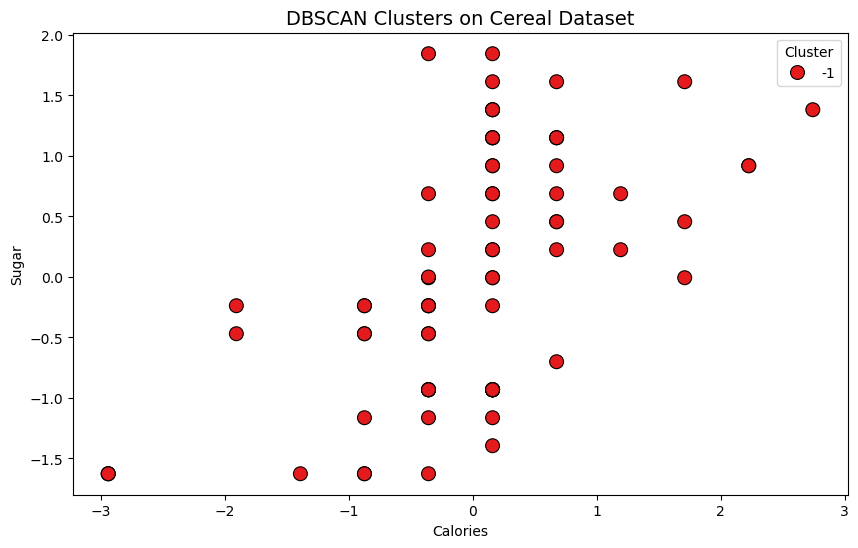

In [81]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='sugars', hue='Cluster', data=cereals_std, palette='Set1', s=100, edgecolor='k')

# Set plot titles and labels
plt.title('DBSCAN Clusters on Cereal Dataset', fontsize=14)
plt.xlabel('Calories')
plt.ylabel('Sugar')
plt.legend(title='Cluster')
plt.show()

In [83]:
import itertools
from sklearn.metrics import silhouette_score

# Step 2: Define a range of values for eps and min_samples
eps_values = np.arange(0.1, 2.0, 0.1)  # Change these values as per your dataset
min_samples_values = range(2, 10)  # Minimum number of points required to form a cluster

# Step 3: Iterate over the grid of eps and min_samples values
best_score = -1
best_params = {'eps': None, 'min_samples': None}
best_labels = None

for eps, min_samples in itertools.product(eps_values, min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(cereals_std)

    # Check if there are at least two clusters formed
    if len(set(labels)) > 1:
        # Step 4: Calculate silhouette score (higher is better)
        score = silhouette_score(cereals_std, labels)

        # Step 5: Store the best parameters based on silhouette score
        if score > best_score:
            best_score = score
            best_params['eps'] = eps
            best_params['min_samples'] = min_samples
            best_labels = labels

# Step 6: Output the best parameters and silhouette score
print(f"Best Silhouette Score: {best_score}")
print(f"Best Parameters: eps={best_params['eps']}, min_samples={best_params['min_samples']}")

Best Silhouette Score: 0.13959959858399767
Best Parameters: eps=1.9000000000000001, min_samples=5


In [93]:
# Step 7: If needed, visualize the best clustering result
import matplotlib.pyplot as plt

cereals_std[:, 0]

#plt.scatter(cereals_std[:, 0], cereals_std[:, 1], c=best_labels, cmap='viridis')
#plt.title(f"DBSCAN with eps={best_params['eps']}, min_samples={best_params['min_samples']}")
#plt.show()

InvalidIndexError: (slice(None, None, None), 0)

### Learning Outcomes

* Be able implement cluster analysis in Python
    * Be able to pre-process data
    * Be able to implement hierarchical clustering
    * Be able to visualise dendrogram and variants of linkage methods
    * Be able to implement the cut-off value to obtain clusters
    * Be able to implement k-means clustering algorithm
    * Be able to experiment with different values of ‘k’ and display the elbow plot of errors
    * Be able to compute Silhouette value of clusters
* Be able to perform cluster stability check
    * Be able to implement the stability check of clusters in multiple ways such as: random sampling of data, changing the value of ‘k’, etc.
* Be able to extract cluster results to interpret cluster profiles
    * Be able to extract the data with annotated cluster id
    * Be able to derive cluster properties by analysing data with cluster statistics
    * Be able to predict the clusters for new samples

#### References:

* https://kapilddatascience.wordpress.com/2015/11/10/using-silhouette-analysis-for-selecting-the-number-of-cluster-for-k-means-clustering/
* https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html